In [27]:
import pandas as pd
import numpy as np
# see orig here: https://www.bmc.com/blogs/pandas-basics/

In [28]:
df = pd.DataFrame([["Fred",80],["Jill",90]],columns=["student", "grade"])

In [29]:
df

,student,grade
0,Fred,80
1,Jill,90


In [30]:
# почему бы не сделать это индексом?
df.set_index("student",inplace=True)
df

,grade
student,
Fred,80
Jill,90


In [31]:
df['birthdate']=['1970-01-12', '1972-05-12']
df

,grade,birthdate
student,,
Fred,80,1970-01-12
Jill,90,1972-05-12


In [32]:
# loc by label
df.loc["Fred"]

grade                80
birthdate    1970-01-12
Name: Fred, dtype: object

In [33]:
# loc by index
df.iloc[0]

grade                80
birthdate    1970-01-12
Name: Fred, dtype: object

In [34]:
# filter?
df[df['birthdate']=='1970-01-12']

,grade,birthdate
student,,
Fred,80,1970-01-12


In [35]:
# доступ к столбцу как в словаре
grade=df['grade']
grade

student
Fred    80
Jill    90
Name: grade, dtype: int64

In [36]:
# при доступе к столбцу получается Series
type(grade)

pandas.core.series.Series

In [37]:
# доступ к столбцу как в словаре
grade=df[['grade']]
grade

,grade
student,
Fred,80
Jill,90


In [38]:
# при доступе через двойные скобки получается DataFrame
type(grade)

pandas.core.frame.DataFrame

In [39]:
# add rows is tough
df2 = pd.DataFrame([[70,'1980-11-12'],[97, '1984-11-01']],index=["Costas", "Ilya"], columns=["grade", "birthdate"])
df3=df.append(df2)

df3

,grade,birthdate
Fred,80,1970-01-12
Jill,90,1972-05-12
Costas,70,1980-11-12
Ilya,97,1984-11-01


In [40]:
# get a random sample
df3.sample(n=2)

,grade,birthdate
Fred,80,1970-01-12
Ilya,97,1984-11-01


In [41]:
# loc slice
df.iloc[0:2]

,grade,birthdate
student,,
Fred,80,1970-01-12
Jill,90,1972-05-12


In [42]:
# можно создать множественный индекс для строк
mult_id = pd.MultiIndex.from_frame(df)
mult_id

MultiIndex([(80, '1970-01-12'),
            (90, '1972-05-12')],
           names=['grade', 'birthdate'])

In [43]:
multi_id_df = pd.DataFrame(np.random.randn(2), index = mult_id)
multi_id_df

,,0
grade,birthdate,
80,1970-01-12,-1.119775
90,1972-05-12,0.567025


In [44]:
multi_id_df.loc[(80, "1970-01-12")]

0   -1.119775
Name: (80, 1970-01-12), dtype: float64

### Приведение типов

In [45]:
bday=pd.to_datetime(df3['birthdate'])
bday

Fred     1970-01-12
Jill     1972-05-12
Costas   1980-11-12
Ilya     1984-11-01
Name: birthdate, dtype: datetime64[ns]

### Map - давайте вычислим возраст

In [46]:
from datetime import datetime 
import numpy as np

today = datetime.now()
today

datetime.datetime(2022, 3, 29, 10, 32, 53, 698198)

In [47]:
days_365 = np.timedelta64(365, 'D')
print(days_365)

365 days


In [48]:
# datetime умеет в арифметические операции
ages = bday.map(lambda l: int((today-l)/days_365))
ages

Fred      52
Jill      49
Costas    41
Ilya      37
Name: birthdate, dtype: int64

In [49]:
# новый столбец можно создать как в словаре
df3['age'] = ages
df3

,grade,birthdate,age
Fred,80,1970-01-12,52
Jill,90,1972-05-12,49
Costas,70,1980-11-12,41
Ilya,97,1984-11-01,37


### Можно и графики сразу построить

<AxesSubplot:xlabel='grade', ylabel='age'>

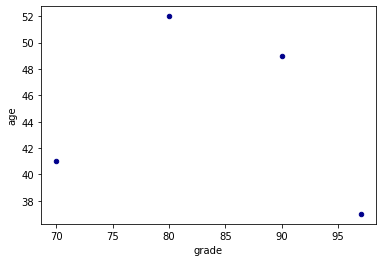

In [50]:
# pandas в бэкенде импортирует matplotlib
df3[['grade','age']].plot.scatter(x='grade',
                      y='age',
                      c='DarkBlue')

In [51]:
# а корр. матрицу построить?
df3[['grade','age']].corr()

,grade,age
grade,1.000000,-0.210699
age,-0.210699,1.000000
